In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
iris = pd.read_csv("https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv")

In [19]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [20]:
iris.corr(numeric_only=True)

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


In [21]:
a=iris["sepal_length"]
b=iris["sepal_width"]
c=iris["petal_length"]
d=iris["petal_width"]
aS="sepal_length"
bS="sepal_width"
cS="petal_length"
dS="petal_width"
data=[a,b,c,d]
data_str=[aS,bS,cS,dS]

In [22]:
#1 : 주어진 데이터의 공분산을 계산하시오
count=1
for i in range(4):
    for j in range(i,4):
        if i!=j:
            print(f"[{count}]{data_str[i]}와 {data_str[j]}의 공분산 : {np.cov(data[i],data[j])[0,1]}")
            count+=1

[1]sepal_length와 sepal_width의 공분산 : -0.03926845637583892
[2]sepal_length와 petal_length의 공분산 : 1.2736823266219242
[3]sepal_length와 petal_width의 공분산 : 0.5169038031319911
[4]sepal_width와 petal_length의 공분산 : -0.3217127516778524
[5]sepal_width와 petal_width의 공분산 : -0.11798120805369128
[6]petal_length와 petal_width의 공분산 : 1.2963874720357944


In [23]:
#2 : 주어진 데이터의 상관계수를 계산하시오
count=1
for i in range(4):
    for j in range(i,4):
        if i!=j:
            print(f"[{count}]{data_str[i]}와 {data_str[j]}의 상관계수 : {np.corrcoef(data[i],data[j])[0,1]}")
            count+=1

[1]sepal_length와 sepal_width의 상관계수 : -0.10936924995064935
[2]sepal_length와 petal_length의 상관계수 : 0.8717541573048714
[3]sepal_length와 petal_width의 상관계수 : 0.8179536333691634
[4]sepal_width와 petal_length의 상관계수 : -0.4205160964011546
[5]sepal_width와 petal_width의 상관계수 : -0.3565440896138058
[6]petal_length와 petal_width의 상관계수 : 0.9627570970509662


In [24]:
iris["sepal_length"].max()

7.9

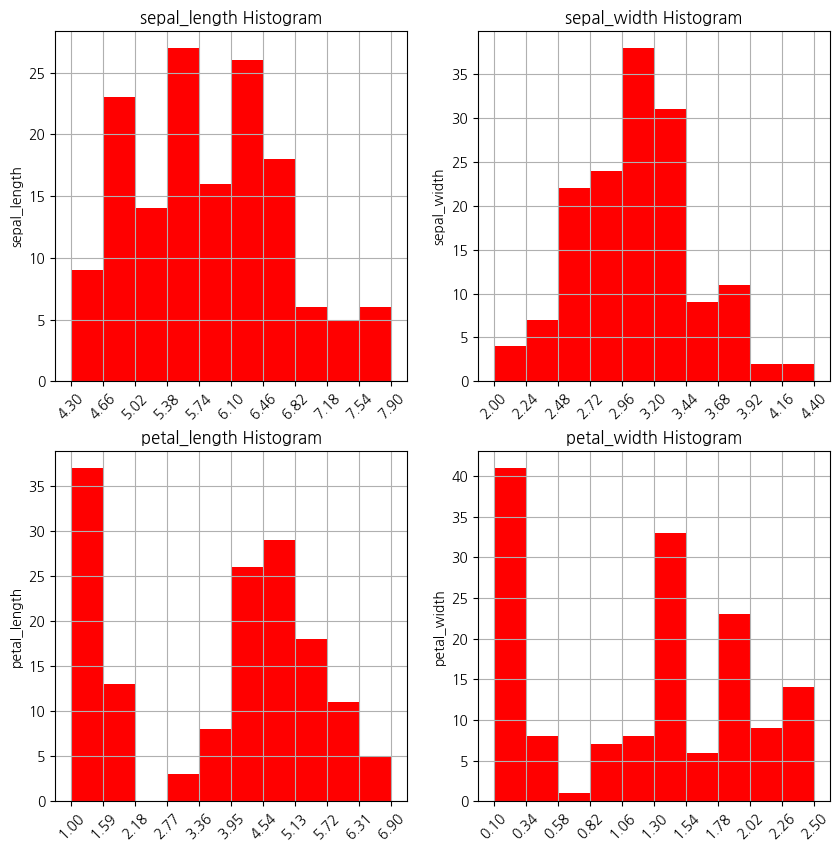

In [25]:
#3 : 각 특성별로 히스토그램을 그려보세요
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

for i in range(4):
    ax = axes[int(i//2), int(i%2)]
    ax.hist(data[i], bins=10, color='red', range=(data[i].min(), data[i].max()), label=f"{data_str[i]}")
    ax.set_title(f"{data_str[i]} Histogram")
    ax.set_ylabel(f"{data_str[i]}")
    xticks = np.linspace(data[i].min(), data[i].max(), 11)
    ax.set_xticks(xticks)
    ax.set_xticklabels([f"{xtick:.2f}" for xtick in xticks], rotation=45)
    
    ax.grid(True)

plt.show()


C:\Users\mathn\AppData\Local\Temp\ipykernel_27828\2842269646.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


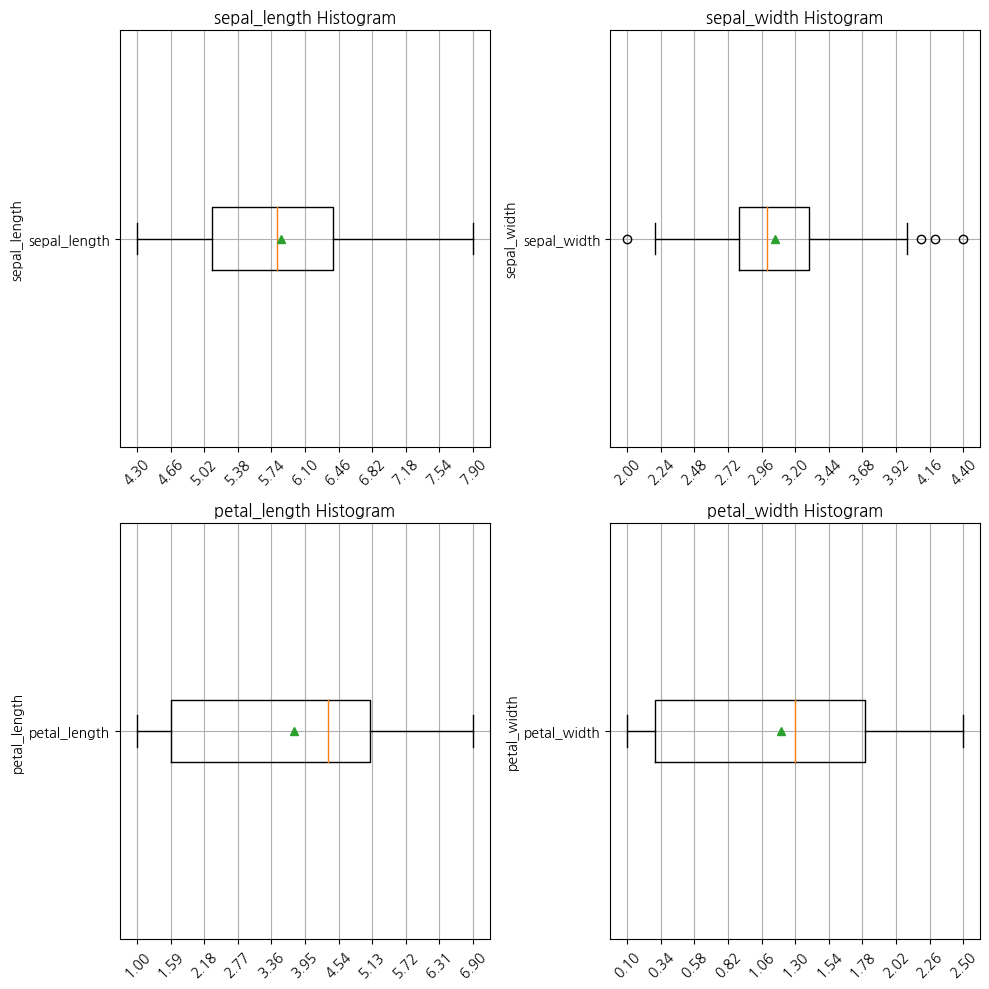

In [26]:
#4 : 각 품종별로 특성(꽃받침 길이, 꽃받침 너비, 꽃잎 길이, 꽃잎 너비)에 대한 상자 그림(boxplot)을 그려보세요.
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

for i in range(4):
    ax = axes[int(i//2), int(i%2)]
    ax.boxplot(data[i], vert=False, labels=[f"{data_str[i]}"], showmeans=True)
    ax.set_title(f"{data_str[i]} Histogram")
    ax.set_ylabel(f"{data_str[i]}")
    xticks = np.linspace(data[i].min(), data[i].max(), 11)
    ax.set_xticks(xticks)
    ax.set_xticklabels([f"{xtick:.2f}" for xtick in xticks], rotation=45)
    
    ax.grid(True)

fig.tight_layout()
fig.show()


In [27]:
iris["species"].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [28]:
a=iris[iris["species"]==iris["species"].unique()[0]]
b=iris[iris["species"]==iris["species"].unique()[1]]
c=iris[iris["species"]==iris["species"].unique()[2]]

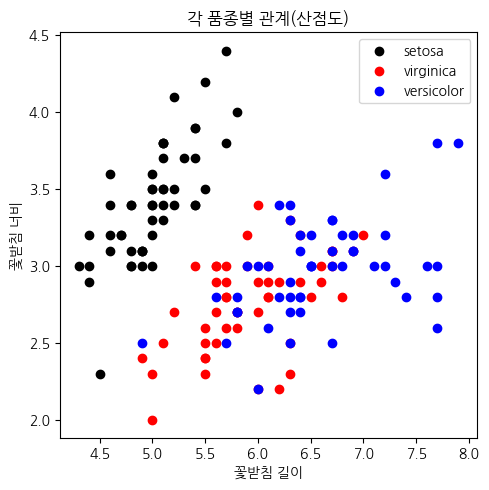

In [31]:
#5 :각 품종별로 꽃받침 길이와 꽃받침 너비의 관계를 산점도로 나타내고, 색상으로 품종을 구분하세요.
import koreanize_matplotlib
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))


axes.scatter(a["sepal_length"],a["sepal_width"],color='black',label="setosa")
axes.scatter(b["sepal_length"],b["sepal_width"],color='red',label="virginica")
axes.scatter(c["sepal_length"],c["sepal_width"],color='blue',label="versicolor")
axes.legend()
axes.set_title("각 품종별 관계(산점도)")
axes.set_xlabel("꽃받침 길이")
axes.set_ylabel("꽃받침 너비")
fig.tight_layout()
